# Лабораторная работа 5

3. Реализовать иерархическую кластеризацию метод Ланса-Уильямса с любым расстоянием между кластерами.


In [33]:
import numpy as np

In [34]:
def lance_williams_dist(dist_us, dist_vs, dist_uv, au, av, b, y):
    return au*dist_us + av*dist_vs + b*dist_uv + y*abs(dist_us - dist_vs)


def lans_williams_clasterization(objects, au, av, b, y):
    clasters = []
    length = len(objects)
    for i in range(length):
        clasters.append(str(i))
    dist_matrix = np.zeros([length, length])
    for i in range(length):
        for j in range(i, length):
            dist_matrix[i, j] = np.linalg.norm(np.array(objects[i]) - np.array(objects[j]))
    print(*clasters)
    k = 0
    while len(clasters) > 1:
        k += 1
        if k >= 10:
            print("Too many iterations")
            break
        min = 1e100
        ind_i = 0
        ind_j = 1
        length = len(clasters)
        for i in range(length):
            for j in range(i, length):
                if dist_matrix[i, j] < min and dist_matrix[i, j] > 0:
                    min = dist_matrix[i, j]
                    ind_i = i
                    ind_j = j
        new_distances = []
        for i in range(length):
            new_distances.append([lance_williams_dist(dist_matrix[i, ind_i], dist_matrix[i, ind_j], dist_matrix[ind_i, ind_j], au, av, b, y)])
        new_distances = np.array(new_distances)
        dist_matrix = np.column_stack((dist_matrix, new_distances))
        zeros = np.zeros(length + 1)
        dist_matrix = np.row_stack((dist_matrix, zeros))
        claster1 = clasters[ind_i]
        claster2 = clasters[ind_j]
        clasters = np.delete(clasters, [ind_i, ind_j], 0)
        clasters = np.append(clasters, claster1 + claster2)
        print(*clasters)
        dist_matrix = np.delete(dist_matrix, [ind_i, ind_j], 0)
        dist_matrix = np.delete(dist_matrix, [ind_i, ind_j], 1)

In [35]:
t = [0,3,1,0,0] # 0 
o = [4,0,1,1,1] # 1
c = [2,24,9,1,1] # 2
p = [1,0,4,1,0] # 3
ob = [3,0,4,0,0] # 4
objects = np.array([t,o,c,p,ob])
lans_williams_clasterization(objects, 1/2, 1/2, 0, 1/2)

0 1 2 3 4
0 1 2 34
0 2 134
2 0134
20134


In [36]:
t = [0,3,1,0,0] # 0 
o = [4,0,1,1,1] # 1
c = [2,24,9,1,1] # 2
p = [1,0,4,1,0] # 3
ob = [3,0,4,0,0] # 4
objects = np.array([t,o,c,p,ob])
lans_williams_clasterization(objects, 1/2, 1/2, 0, -1/2)

0 1 2 3 4
0 1 2 34
0 2 134
2 0134
20134


 Дивизивная кластеризация

In [37]:
def find_average_max(matrix):
    max = 0
    index = -1
    length = len(matrix[0])
    for i in range(length):
        sum = 0
        sum = np.sum(matrix[i, :])
        sum /= length
        if sum > max:
            max = sum
            index = i
    return index


def euclid_dist(obj1, obj2):
    sum = 0
    for i in range(len(obj1)):
        sum += np.square(obj1[i] - obj2[i])
    return np.sqrt(sum)


def find_element_to_delete(matrix, claster1, claster2, objects):
    av_dist1 = 0
    av_dist2 = 0
    index = -1
    length = len(matrix[0])
    for i in range(length):
        av_dist1 = 0
        av_dist2 = 0
        av_dist1 = np.sum(matrix[i,:])
        av_dist1 /= length
        for j in range(len(claster2)):
            av_dist2 += euclid_dist(objects[int(claster1[i])], objects[int(claster2[j])])
        av_dist2 /= len(claster2)
        if av_dist1 > av_dist2:
            index = i
            return index
    return -1

def divisive_clasterization(objects):
    clasters = []
    length = len(objects)
    claster_1 = ""
    for i in range(length):
        claster_1 += str(i)
    clasters.append(claster_1)
    dist_matrix = np.zeros([length, length])
    k = 0
    print(*clasters)
    while len(clasters) != len(objects):
        length = len(clasters[k])   
        if length == 1:
            k += 1
            continue
        dist_matrix = np.zeros([length, length])
        for i in range(length):
            for j in range(length):
                dist_matrix[i,j] = euclid_dist(objects[int(clasters[k][i])], objects[int(clasters[k][j])])
        index = find_average_max(dist_matrix)
        clasters.append(clasters[k][index])
        clasters[k] = clasters[k].replace(clasters[k][index], '')
        while True:
            index = -1
            length = len(clasters[k])
            dist_matrix = np.zeros([length, length])
            for i in range(length):
                for j in range(length):
                    dist_matrix[i,j] = euclid_dist(objects[int(clasters[k][i])], objects[int(clasters[k][j])])
            index = find_element_to_delete(dist_matrix, clasters[k], clasters[len(clasters)-1], objects)
            if index > -1:
                clasters[len(clasters) - 1] += clasters[k][index]
                clasters[k] = clasters[k].replace(clasters[k][index],'')
            else:
                break
        print(*clasters)

In [38]:
t = [0,3,1,0,0] # 0 
o = [4,0,1,1,1] # 1
c = [2,24,9,1,1] # 2
p = [1,0,4,1,0] # 3
ob = [3,0,4,0,0] # 4
objects = np.array([t,o,c,p,ob])
divisive_clasterization(objects)

01234
0134 2
134 2 0
34 2 0 1
4 2 0 1 3


In [39]:
t = [0,3,1,0,0] # 0 
o = [4,0,1,1,1] # 1
c = [2,24,9,1,1] # 2
p = [1,0,4,1,0] # 3
ob = [3,0,4,0,0] # 4
ob1 = [1,0,0,0,0] # 5
ob2 = [0.9,0,0,0,0] # 6
objects = np.array([t,o,c,p,ob,ob1,ob1])
divisive_clasterization(objects)

0123456
013456 2
13456 2 0
156 2 0 34
56 2 0 34 1
5 2 0 34 1 6
5 2 0 4 1 6 3


Детектор Канни

In [104]:
from PIL import Image
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def from_rgb_to_brightness(r, g, b):
    Y = 0.222 * r + 0.707 * g + 0.071 * b
    return Y

def beg(i, j):
     new_i, new_j = i, j
     if i < 0:
          new_i = 0
     if j < 0:
          new_j = 0
     return new_i, new_j

def end(i, j, max_i, max_j):
     new_i, new_j = i, j
     if i >= max_i:
          new_i = max_i
     if j >= max_j:
          new_j = max_j
     return new_i, new_j

def get_brightness(arr):
    return  0.222 * arr[:,:,0] + 0.707 *arr[:,:,1] + 0.071 * arr[:,:,2]

def median_filter(img, y):
    img = Image.open(img)
    arr = np.array(img)
    arr_br = from_rgb_to_brightness(arr[:,:,0], arr[:,:,1], arr[:,:,2])
    height, width = arr_br.shape
    new_arr = np.zeros((height, width))
    for i in range(height):
        for j in range(width):
            row, col = beg(i - y, j - y)
            row1, col1 = end(i + y, j + y, height, width)
            window = arr_br[row:row1 + 1, col:col1 + 1]
            new_arr[i, j] = np.median(window)
    return new_arr

def sobel_operator(matrix):
    x_der_matrix = np.array([[1,0,-1],
                             [2,0,-2],
                             [1,0,-1]])
    y_der_matrix = np.array([[1,2,1],
                             [0,0,0],
                             [-1,-2,-1]])
    width = len(matrix[0])
    height = len(matrix[:, 0])
    sob_matrix = np.zeros([height, width*2 + 1])
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            sub = matrix[i-1:i+2, j-1:j+2]
            x_der = np.sum(x_der_matrix*sub)
            y_der = np.sum(y_der_matrix*sub)
            der = np.sqrt(np.square(x_der) + np.square(y_der))
            theta = -100
            if der != 0:
                theta = np.round(np.arctan2(y_der, x_der)/(np.pi/4))*(np.pi/4) - np.pi/2
            sob_matrix[i, j] = der
            sob_matrix[i, j+1+width] = theta
    return sob_matrix

def is_correct_index(matrix, x, y):
    width = len(matrix[0])
    height = len(matrix[:, 0])
    if x < 0 or x >= height or y < 0 or y >= width:
        return 0
    else:
        return 1

def check(matrix, x, y, v):
    if is_correct_index(matrix, x, y):
        if matrix[x,y] <= v:
            return 1
    return 0

def non_max_suppression(sob_matrix):
    width = len(sob_matrix[0])
    g_matrix = sob_matrix[:, :int(width/2)]
    ang_matrix = sob_matrix[:, int(width/2)+1:]
    width = len(g_matrix[0])
    height = len(g_matrix[:, 0])
    ans_matrix = np.zeros([height, width])
    for i in range(height):
        for j in range(width):
            if ang_matrix[i,j] == -100:
                continue
            else:
                dx = int(np.sign(np.cos(ang_matrix[i,j])))
                dy = -int(np.sign(np.sin(ang_matrix[i,j])))
                if check(g_matrix, i+dx, j+dy, g_matrix[i,j]):
                    ans_matrix[i+dx,j+dy] = 0
                if check(g_matrix, i-dx,j-dy, g_matrix[i,j]):
                    ans_matrix[i-dx,j-dy] = 0
                ans_matrix[i,j] = g_matrix[i,j]
    return ans_matrix

def double_thresholding(matrix, low_pr, high_pr):
    down = low_pr*255
    up = high_pr*255
    width = len(matrix[0])
    height = len(matrix[:, 0])
    ans = np.zeros([height, width])
    for i in range(height):
        for j in range(width):
            if matrix[i,j] >= up:
                ans[i,j] = 255
            else:
                if matrix[i,j] <= down:
                    ans[i,j] = 0
                else:
                    ans[i,j] = 127
    return ans

def blob_analysis(matrix, high, clear):
    move__dir_matrix = np.array([[-1,-1,-1,0,0,1,1,1],
                            [-1,0,1,-1,1,-1,0,1]])
    width = len(matrix[0])
    height = len(matrix[:, 0])
    for i in range(height):
        for j in range(width):
            if matrix[i,j] == high:
                matrix[i,j] = high
                for k in range(8):
                    dx = move__dir_matrix[0,k]
                    dy = move__dir_matrix[1,k]
                    while True:
                        x = i + dx
                        y = j + dy
                        if not is_correct_index(matrix, x, y):
                            break
                        if matrix[x, y] == clear or matrix[x,y] == high:
                            break
                        matrix[x,y] = high
            else:
                matrix[i, j] = clear
    return matrix
 
def kanni_detector(img, median_y=3, low_pr=0.5, high_pr=0.65):
    im = Image.open(img)
    arr = np.array(im)
    fig = plt.figure(figsize=(14, 14))
    fig.add_subplot(1, 4, 1)
    plt.axis('off')
    plt.imshow(arr)

    arr_br = from_rgb_to_brightness(arr[:,:,0], arr[:,:,1], arr[:,:,2])
    new_arr = gaussian_filter(arr_br, sigma=0.12)
    # new_arr = median_filter(img, median_y)
    plt.subplot(1, 4, 2)
    plt.axis('off')
    plt.imshow(new_arr, cmap="gray")

    fig.add_subplot(1, 4, 3)
    plt.axis('off')
    sob_matrix = sobel_operator(new_arr)
    supressed = non_max_suppression(sob_matrix)
    thresholded = double_thresholding(supressed, low_pr, high_pr)
    plt.imshow(thresholded, cmap="gray")
    
    fig.add_subplot(1, 4, 4)
    plt.axis('off')
    final = blob_analysis(thresholded, 255, 0)
    plt.imshow(final, cmap="gray")
    plt.show()

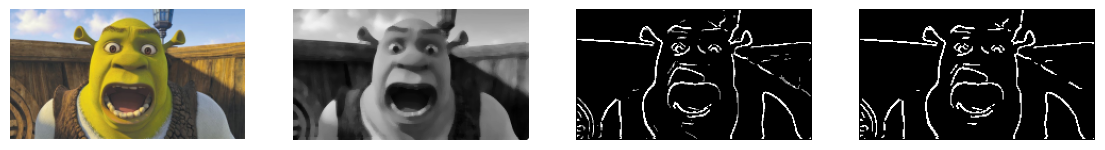

In [81]:
kanni_detector("test5.png", median_y=2)

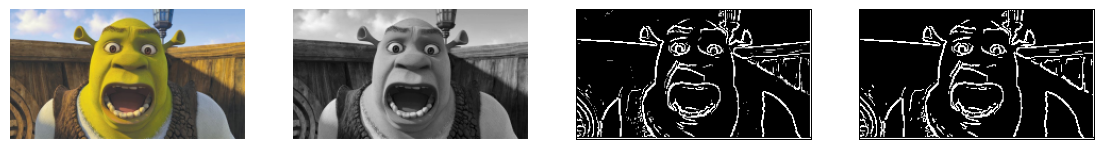

In [121]:
kanni_detector("test5.png", low_pr=0.5, high_pr=0.6)

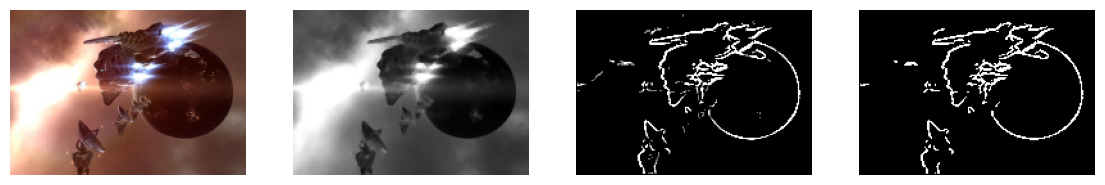

In [94]:
kanni_detector("test7.png", median_y=1)

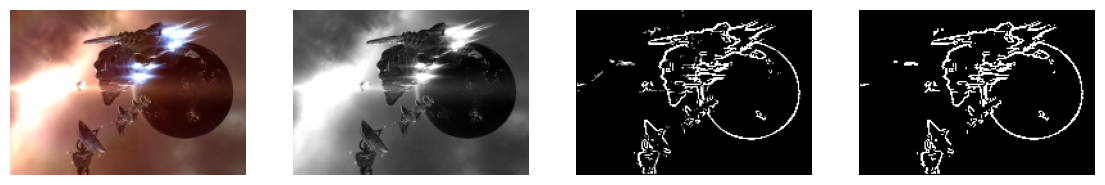

In [90]:
kanni_detector("test7.png")

Поиск нулей (Marr-Hildreth algorithm)

In [135]:
def apply_laplas_matrix(arr_br):
    filter = np.array([[-1,-1,-1],
                       [-1,8,-1],
                       [-1,-1,-1]])
    shift = 1
    width = len(arr_br[0])
    height = len(arr_br[:, 0])
    new_arr = arr_br.copy()
    for i in range(shift, height - shift):
        for j in range(shift, width - shift):
            sub = arr_br[i-shift:i+shift+1, j-shift:j+shift+1]
            new_arr[i, j] = np.sum(sub * filter)
    new_arr = new_arr[shift:height-shift, shift:width-shift]
    return new_arr

def calculate_2nd_der(matrix):
    lxx_win = np.array([1,-2,1])
    lxy_win = np.array([[-1/4,0,1/4],
                        [0,0,0],
                        [1/4,0,-1/4]])
    lyy_win = np.array([[1],
                    [-2],
                    [1]])
    width = len(matrix[0])
    height = len(matrix[:, 0])
    ans = np.zeros([height, width])
    for i in range(1,height-1):
        for j in range(1,width-1):
            sub = matrix[i, j-1:j+2]
            lxx = np.sum(sub*lxx_win)
            sub = matrix[i-1:i+2,j-1:j+2]
            lxy = np.sum(sub*lxy_win)
            sub = matrix[i-1:i+2,j]
            lyy = np.sum(sub*lyy_win)
            ans[i,j] = lxx + 2 * lxy + lyy
    return ans

def Marr_Hildreth(img, sigma=0.7, edge=200):
    fig = plt.figure(figsize=(14, 14))
    fig.add_subplot(1, 4, 1)
    plt.axis('off')
    plt.imshow(np.array(Image.open(img)))

    img = Image.open(img)
    arr = np.array(img)
    arr_br = get_brightness(arr)
    new_arr = gaussian_filter(arr_br, sigma)
    plt.subplot(1, 4, 2)
    plt.axis('off')
    plt.imshow(new_arr, cmap="gray")

    laplaced = apply_laplas_matrix(new_arr)
    sobel = sobel_operator(laplaced)
    width = len(sobel[0])
    sobel = sobel[:, :int(width/2)]
    height = len(sobel[:, 0])
    width = len(sobel[0])

    plt.subplot(1, 4, 3)
    plt.axis('off')
    plt.imshow(sobel, cmap="gray")

    second_der = calculate_2nd_der(sobel)


    ans = np.zeros([height, width])
    for i in range(height):
        for j in range(width):
            if sobel[i,j] > 0 and second_der[i,j] < 0 and sobel[i,j] - second_der[i,j] > edge:
                ans[i,j] = 255

    plt.subplot(1, 4, 4)
    plt.axis('off')
    plt.imshow(ans, cmap="gray")
    return ans


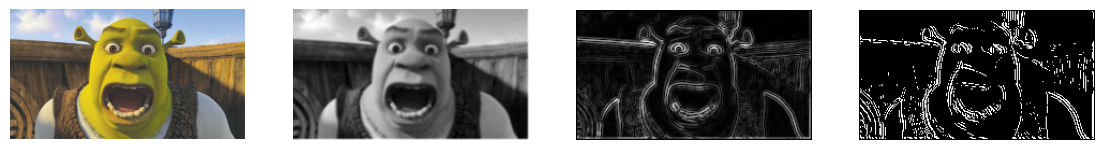

In [164]:
res = Marr_Hildreth("test5.png", sigma=0.8, edge=450)

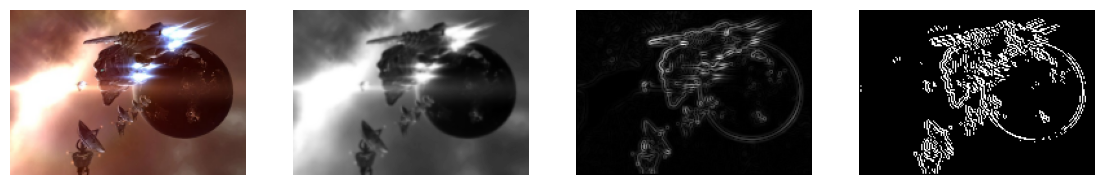

In [151]:
res = Marr_Hildreth("test7.png", sigma=0.7, edge=300)